# importing Importent Libraries

In [5]:
#Data Handeling

import pandas as pd 
import numpy as np 


#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing

import nltk
import string
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize

#Machine Learning Algorithm

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Model Evaluation

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix 

# importing dataset

In [6]:
import warnings 
warnings.filterwarnings("ignore")
data_set = pd.read_csv("spam_ham_dataset.csv")

data_set = data_set.drop("Unnamed: 0" , axis = 1)

data_set = data_set.rename({"label_num":"class" }, axis = 1)

data_set.columns = ["label","text","class"]

# Data set Visualization

In [7]:
data_set.sample(4)

,label,text,class
332,ham,"Subject: hpl nom for may 11 , 2001\r\n( see at...",0
1019,ham,Subject: calpine daily gas nomiantion\r\nper o...,0
4031,ham,Subject: mtr 980070 for 10 / 29 - 31 / 1999\r\...,0
2149,spam,Subject: sweet virgins love hard sex : )\r\nfi...,1


In [8]:
data_set.columns


Index(['label', 'text', 'class'], dtype='object')

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
 2   class   5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [10]:
data_set.drop_duplicates(inplace = True)
data_set.shape

(4993, 3)

In [11]:
data_set.head()

,label,text,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


<AxesSubplot:xlabel='label', ylabel='count'>

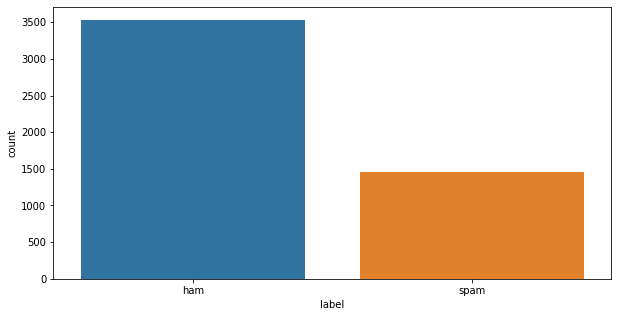

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(data = data_set ,x = "label" )

In [13]:
for i in data_set.iterrows():
    print(f"Class Label: {i[1][0]}\n Mail: \n{i[1][1]}\n\n")
    if i[0] == 5: break

Class Label: ham
 Mail: 
Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


Class Label: ham
 Mail: 
Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls


Class Label: ham
 Mail: 
Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 -

# Text Preprocessing

In [14]:
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

data_set['text'] = data_set['text'].apply(lambda x: ' '.join([ word for word in word_tokenize(x)  if not word in stop_words]))

[nltk_data] Downloading package punkt to /home/md/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
data_set.text.head()

0    Subject : enron methanol ; meter # : 988291 fo...
1    Subject : hpl nom january 9 , 2001 ( see attac...
2    Subject : neon retreat ho ho ho , ' around won...
3    Subject : photoshop , windows , office . cheap...
4    Subject : : indian springs deal book teco pvr ...
Name: text, dtype: object

# Separate data set

In [17]:
x = data_set.loc[:, 'text']
y = data_set.loc[:, 'class']

print(f"Shape of X is = {x.shape}\nShape of Y is = {y.shape}")

Shape of X is = (4993,)
Shape of Y is = (4993,)


# Split data into train and test in 70:30


In [18]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.30 , random_state = 1)

print(f"Shape of Traing Data = {xtrain.shape} \nShape of Testing Data = {xtest.shape}")

Shape of Traing Data = (3495,) 
Shape of Testing Data = (1498,)


# Feature Extaction using CountVectorizer

In [20]:
cVect = CountVectorizer()
cVect.fit(xtrain)

CountVectorizer()

In [21]:
dtv = cVect.transform(xtrain)

In [22]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 3495
Tokens/Features: 39834


# Applay Naive Bayes on Traing data

In [24]:
MNB = MultinomialNB()
MNB.fit(dtv,ytrain)

MultinomialNB()

# Model Evaluate on the Test data


In [19]:
test_dtv = cVect.transform(xtest)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 1498
Tokens/Features: 39834


In [20]:
#Predict on the Test data

prediction = MNB.predict(test_dtv)

In [21]:
# Model Evaluation
#Model Accuracy , 

print(f"Accuracy = {accuracy_score(ytest, prediction) * 100}")

Accuracy = 97.66355140186917


In [22]:

# 0 - Not Spam / Ham
# 1 - Spam 
print(classification_report(ytest, prediction))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1076
           1       0.95      0.96      0.96       422

    accuracy                           0.98      1498
   macro avg       0.97      0.97      0.97      1498
weighted avg       0.98      0.98      0.98      1498



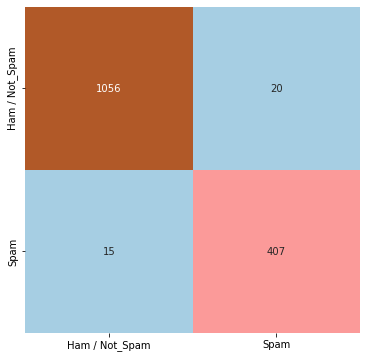

In [23]:
cmat = confusion_matrix(ytest, prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Ham / Not_Spam', 'Spam'], yticklabels=['Ham / Not_Spam', 'Spam']);

# 😀Start Prediction😉

In [3]:
# 'You won 1000$ prize money in lottery. Click here to avail'
cVect = CountVectorizer()
def predict_class(MNB):
    text = input('Enter Text(Subject of the mail): ')
    text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
    t_dtv = cVect.fit_transform(text).toarray()
    print('Predicted Class:', end = ' ')
    print('Spam' if MNB.predict(cVect)[0] else 'Not Spam') 
    

In [ ]:
predict_class(MNB)